In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import csv data
data = pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Pre-processing

In [2]:
data.set_index('PassengerId',inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
#details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Insights
1.There are 891 rows and 11 columns
2.Two float type,4 int type,5 object type features
3.Age,Cabin,Embarked columns have 117,687,2 null values respectively

In [6]:
#a)Handling missingvalue in Age column
data['Age'] = data['Age'].fillna(data['Age'].median())


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
#b)Handling missing value in Embarked column
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [10]:
#c)Handling missing value in Cabin coloumn
data['Cabin'].fillna('unknown',inplace = True)

In [11]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [12]:
x=data.drop(['Survived','Name'],axis=1)#features
x= pd.get_dummies(x)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_unknown,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,3,28.0,1,2,23.4500,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [13]:
y = data['Survived']

# Models

In [14]:
from sklearn.model_selection import train_test_split

# Spliting the dataset for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# 1.K-NN

In [16]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

C:\Users\AbinPC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\AbinPC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

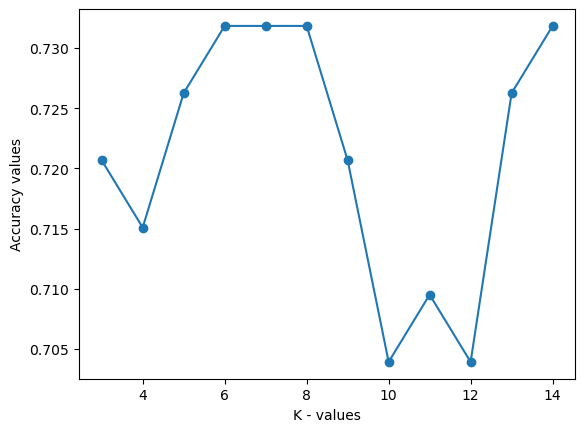

In [17]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [18]:
classifier=knn(n_neighbors=7,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

log_ac=accuracy_score(y_test,y_pred)
log_f1=f1_score(y_test,y_pred,average='weighted')

C:\Users\AbinPC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       105
           1       0.73      0.55      0.63        74

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.71       179
weighted avg       0.73      0.73      0.72       179



In [20]:
acc_knn = accuracy_score(y_test,y_pred)
models = []
models.append(['k-NN Classifier',acc_knn])


# 2.SVM

In [ ]:
#2.1: Linear SVM
from sklearn.svm import SVC

svm_linear=SVC(kernel='linear')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       105
           1       0.73      0.55      0.63        74

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.71       179
weighted avg       0.73      0.73      0.72       179



In [22]:
acc_linear = accuracy_score(y_test,y_pred)
acc_linear
models.append(['Linear SVM',acc_linear])

In [ ]:
#2.2 Ploynomial SVM:
svm_linear=SVC(kernel='poly')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       105
           1       0.73      0.55      0.63        74

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.71       179
weighted avg       0.73      0.73      0.72       179



In [24]:
acc_poly = accuracy_score(y_test,y_pred)
acc_poly
models.append(['Polynomial SVM',acc_poly])

# 3: RBF SVM

In [ ]:

svm_linear=SVC(kernel='rbf')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.73      0.86      0.79       105
           1       0.73      0.55      0.63        74

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.71       179
weighted avg       0.73      0.73      0.72       179



In [26]:
acc_rbf = accuracy_score(y_test,y_pred)
acc_rbf
models.append(['Radial Basis Function SVM',acc_rbf])

# 4.K fold cross validation

In [27]:
from sklearn.model_selection import KFold
kfold_validator =KFold(10)
for train_index,test_index in kfold_validator.split(x,y):
    print("Training Index: " ,train_index)
    print("Testing index: " , test_index)

Training Index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [28]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model = LR_model.fit(x_train,y_train)
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(LR_model,x,y,cv=kfold_validator)
cv_result

C:\Users\AbinPC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AbinPC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.78888889, 0.82022472, 0.80898876, 0.80898876, 0.83146067,
       0.78651685, 0.7752809 , 0.76404494, 0.86516854, 0.82022472])

In [30]:
kf = np.mean(cv_result)

In [31]:
models.append(['K Fold Cross Validation',kf])

# 5.Stratified Cross Validation

In [33]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)

In [34]:
for train_index,test_index in skfold_validator.split(x,y):
    print("Training Index: " ,train_index)
    print("Testing index: " , test_index)

Training Index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [35]:
cv_result = cross_val_score(LR_model,x,y,cv=skfold_validator)
cv_result

C:\Users\AbinPC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AbinPC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.81111111, 0.82022472, 0.76404494, 0.83146067, 0.85393258,
       0.78651685, 0.80898876, 0.74157303, 0.80898876, 0.80898876])

In [36]:
st = np.mean(cv_result)
st

0.8035830212234707

In [37]:
models.append(['Stratified Cross Validation',st])

In [38]:
mod = pd.DataFrame(models, columns = ['Models','Accuracy Score'])
mod

,Models,Accuracy Score
0,k-NN Classifier,0.731844
1,Linear SVM,0.731844
2,Polynomial SVM,0.731844
3,Radial Basis Function SVM,0.731844
4,K Fold Cross Validation,0.806979
5,Stratified Cross Validation,0.803583


In [ ]:
#Finding:
*Most accurate model is K Fold Cross Validation